<a href="https://colab.research.google.com/github/Vite-Noiz/Machine-Learning-Course/blob/main/My%20HW/MiniP4/MiniP4_Q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Initialization**

**Import libraries**

In [ ]:
import numpy as np
import random
import torch
import torch.nn as nn
import torch.optim as optim
from collections import deque
import matplotlib.pyplot as plt

np.random.seed(6)
random.seed(6)
torch.manual_seed(6)

**Wumpus world game**

In [ ]:
class WumpusWorld():

	def __init__(self):

		self.Worldgrid = np.array([
			['p', 'o', 'o', 'o'],
			['o', 'o', 'p', 'o'],
			['o', 'p', 'g', 'w'],
			['o', 'o', 'o', 'o']
		])

		self.reset()

	def reset(self):
		self.agentPos = np.array([0,1])
		self.shootPos = np.array([-1,-1])
		self.wumpusIsKilled = False
		return self.getState()

	def getState(self):
		if self.wumpusIsKilled :
			return self.agentPos[0] +  4 * (self.agentPos[1]) + 16
		else:
			return self.agentPos[0] +  4 * (self.agentPos[1])


	def step(self, action):

        # Moves

		if action == 'u' and self.agentPos[1] < 3 :  # Up
			self.agentPos[1] += 1
		elif action == 'd' and self.agentPos[1] >  0 :  # Down
			self.agentPos[1] -= 1
		elif action == 'l' and self.agentPos[0] > 0 :  # Left
			self.agentPos[0] -= 1
		elif action == 'r' and self.agentPos[0] < 3 :  # Right
			self.agentPos[0] += 1

        # Shoot

		elif action == 'su' and self.agentPos[1] < 3:  # Shoot Up
			self.shootPos = self.agentPos + np.array([0,1])

		elif action == 'sd' and self.agentPos[1] >  0 :  # Shoot Down
			self.shootPos = self.agentPos + np.array([0,-1])

		elif action == 'sr' and self.agentPos[0] < 3 :  # Shoot Left
			self.shootPos = self.agentPos + np.array([1,0])

		elif action == 'sl' and self.agentPos[0] > 0 :  # Shoot Right
			self.shootPos = self.agentPos + np.array([-1,0])


		done = False
		reward = -1 # Default Reward

		x, y = self.agentPos
		cell = self.Worldgrid[x][y]


		if cell == 'w':
			if not self.wumpusIsKilled :
				reward = -1000  # Wumpus
				done = True     # Terminal state
		elif cell == 'p':
			reward = -1000      # Pit
			done = True         # Terminal state
		elif cell == 'g':
			reward =  100       # Gold
			done = True         # Terminal state


		if np.sum(self.shootPos) > 0 :

			x, y = self.shootPos
			shoot_cell = self.Worldgrid[x][y]

			if not self.wumpusIsKilled :

				if shoot_cell == 'w' :
					reward = 50  # Kill wumpus
					self.wumpusIsKilled = True

			self.shootPos = np.array([-1,-1])

		return self.getState(), reward , done



# **Use Q-Learning**

4  : u  >>  8 ---->  -1
8  : u  >>  12 ---->  -1
12  : r  >>  13 ---->  -1
13  : sr  >>  13 ---->  50
29  : r  >>  14 ---->  -1
30  : d  >>  10 ---->  100

 Total rewards for optimal episode :  146


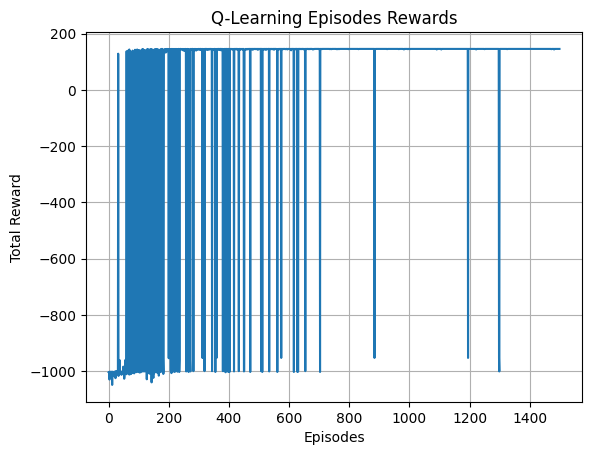

In [ ]:
class Agent:
	def __init__(self, WumpusWorld, learningRate=0.1, discountFactor=0.9, eps=1.0, explorationDecay=0.995, minExplorationRate=0.005):
		self.WumpusWorld = WumpusWorld
		self.learningRate = learningRate
		self.discountFactor = discountFactor
		self.eps = eps
		self.explorationDecay = explorationDecay
		self.minExplorationRate = minExplorationRate
		self.Qmatrix = np.zeros((32, 8 ))
		self.actions = np.array(['u','d','r','l','su','sd','sr','sl'])


	def chooseAction(self, state):
		if np.random.rand() < self.eps:
			return np.random.randint(8)
		else:
			return np.argmax(self.Qmatrix[state, :])

	def learn(self, state, action, reward , nextState):
		bestNextAction = np.argmax(self.Qmatrix[nextState, :])
		tdTarget = reward + self.discountFactor * self.Qmatrix[nextState, bestNextAction]
		tdError = tdTarget - self.Qmatrix[state, action]
		self.Qmatrix[state, action] += self.learningRate * tdError


	def train(self, episodes=1500):

		listQStartUp = np.array([])
		listQStartRight = np.array([])

		rewardsQl = []
		for episode in range(episodes):
			state = self.WumpusWorld.reset()
			totalReward = 0
			done = False
			while not done:
				action = self.chooseAction(state)
				nextState, reward, done = self.WumpusWorld.step( self.actions[action] )
				self.learn(state, action, reward, nextState)

				if episode == 1200 :
					if wumpusworld .wumpusIsKilled :
						print(state , ' :' , self.actions[action] , ' >> ' , nextState - 16 , '----> ' , reward )
					else:
						print(state , ' :' , self.actions[action] , ' >> ' , nextState , '----> ' , reward )

				state = nextState
				totalReward += reward


			listQStartUp = np.append(listQStartUp, agent.Qmatrix[4, 0] )

			listQStartRight = np.append(listQStartRight, agent.Qmatrix[4, 2] )


			rewardsQl.append(totalReward)
			self.eps = max(self.minExplorationRate, self.eps * self.explorationDecay)
		return rewardsQl , listQStartUp , listQStartRight

# Create the fixed environment and agent
wumpusworld = WumpusWorld()
agent = Agent(wumpusworld)

rewardsQl , listQStartUp , listQStartRight = agent.train()

print('\n','Total rewards for optimal episode : ' , rewardsQl[-1])


plt.plot(rewardsQl)
plt.grid(True)
plt.xlabel('Episodes')
plt.ylabel('Total Reward')
plt.title('Q-Learning Episodes Rewards')
plt.show()


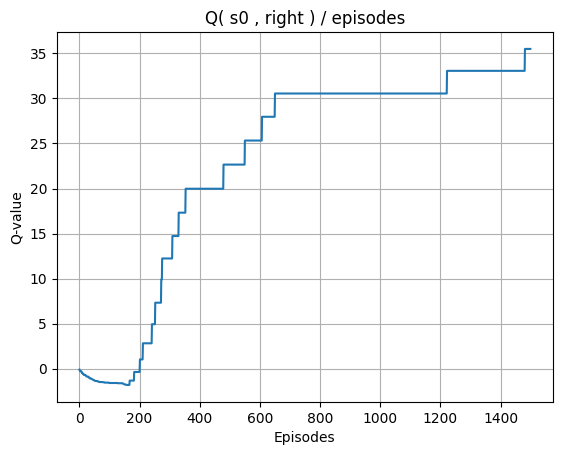

In [ ]:
plt.figure()
plt.title('Q( s0 , right ) / episodes')
plt.plot(listQStartRight)
plt.xlabel('Episodes')
plt.ylabel('Q-value')
plt.grid(True)
plt.show()


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

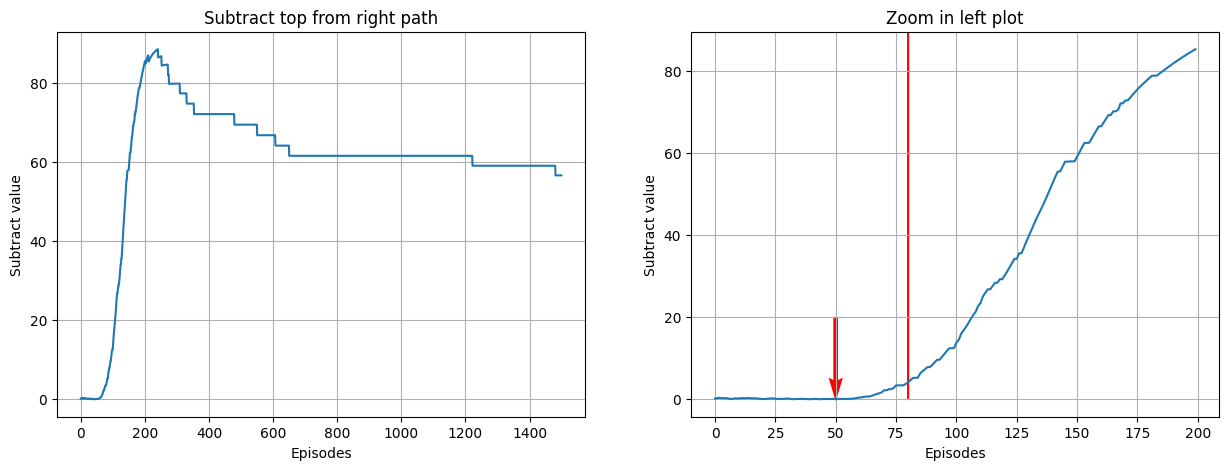

In [ ]:
subtractUpRight = listQStartUp - listQStartRight

def routesValueSubtraction(interrupt , ys , ly , detectionPoint):

	plt.clf()
	plt.figure()
	fig , ( ax_1 , ax_2 )= plt.subplots(nrows=1 , ncols=2)
	ax_1.set_title('Subtract top from right path')
	ax_2.set_title('Zoom in left plot')
	ax_1.plot(subtractUpRight)
	ax_2.plot(subtractUpRight[0:200])


	ax_2.quiver(detectionPoint , 0 , 0, 80 , scale = 1 , width = 0.004 , color = 'r')

	ax_1.set_xlabel('Episodes')
	ax_1.set_ylabel('Subtract value')
	ax_2.set_xlabel('Episodes')
	ax_2.set_ylabel('Subtract value')
	ax_1.grid(True);
	ax_2.grid(True);
	fig.set_size_inches(15, 5, forward=False)


	ax_2.quiver(interrupt , ys , 0 , ly , scale = 1 , width = 0.009 , color = 'r')
	plt.show()

routesValueSubtraction(50 , 20 , -0.16 , 80)

# **Use Deep Q-Network**

Episode 200	Average Score: -988.88
Episode 400	Average Score: -780.29
Episode 600	Average Score: -506.60
Episode 800	Average Score: -351.84
Episode 1000	Average Score: -333.38
Episode 1200	Average Score: -254.18
Episode 1400	Average Score: -198.35


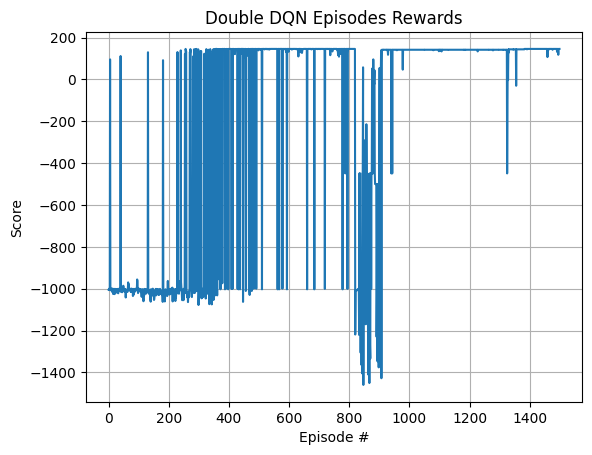

In [ ]:
class QNet(nn.Module):
    def __init__(self, stateSize, actionSize):
        super(QNet, self).__init__()
        self.fc1 = nn.Linear(stateSize, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, actionSize)

    def forward(self, state):
        x = torch.relu(self.fc1(state))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)

# Define the Replay Buffer
class ReplayBuffer:
	def __init__(self, buffer_size, batch_size):
		self.memory = deque(maxlen=buffer_size)
		self.batch_size = batch_size

	def add(self, state, action, reward, next_state, done):
		self.memory.append((state, action, reward, next_state, done))

	def sample(self):
		experiences = random.sample(self.memory, k=self.batch_size)
		states, actions, rewards, next_states, dones = zip(*experiences)
		return (np.array(states), np.array(actions), np.array(rewards), np.array(next_states), np.array(dones))

	def __len__(self):
		return len(self.memory)

# Define the Agent
class DDQNAgent:
	def __init__(self, stateSize, actionSize, buffer_size, batch_size, gamma, optimizer_lr , bellman_lr , tau, update_every, device):
		self.stateSize = stateSize
		self.actionSize = actionSize
		self.gamma = gamma
		self.tau = tau
		self.update_every = update_every
		self.device = device
		self.QNet_local = QNet(stateSize, actionSize).to(device)
		self.QNet_target = QNet(stateSize, actionSize).to(device)
		self.optimizer = optim.Adam(self.QNet_local.parameters(), lr=optimizer_lr)
		self.bellman_lr = bellman_lr
		self.memory = ReplayBuffer(buffer_size, batch_size)
		self.t_step = 0


	def step(self, state, action, reward, next_state, done):
		self.memory.add(state, action, reward, next_state, done)
		self.t_step = (self.t_step + 1) % self.update_every
		if self.t_step == 0 and len(self.memory) > self.memory.batch_size:
			experiences = self.memory.sample()
			self.learn(experiences)

	def act(self, state, eps=0.):
		state = torch.FloatTensor(state).unsqueeze(0).to(self.device)
		self.QNet_local.eval()
		with torch.no_grad():
			action_values = self.QNet_local(state)
		self.QNet_local.train()

		if np.random.rand() > eps:
			return np.argmax(action_values.cpu().data.numpy())
		else:
			return np.random.randint(self.actionSize)


	def learn(self, experiences):
		states, actions, rewards, next_states, dones = experiences

		states = torch.FloatTensor(states).squeeze(1).to(self.device)
		actions = torch.LongTensor(actions).unsqueeze(1).to(self.device)
		rewards = torch.FloatTensor(rewards).unsqueeze(1).to(self.device)

		next_states = torch.FloatTensor(next_states).squeeze(1).to(self.device)
		dones = torch.FloatTensor(dones).unsqueeze(1).to(self.device)

		q_targets_next = self.QNet_target(next_states).detach().max(1)[0].unsqueeze(1)
		q_targets = rewards + (self.gamma * q_targets_next * (1 - dones))
		q_expected = self.QNet_local(states).gather(1, actions)

		q_expected = q_expected + self.bellman_lr * (q_expected - q_targets)

		loss = nn.MSELoss()(q_expected, q_targets)

		self.optimizer.zero_grad()
		loss.backward()
		self.optimizer.step()

		self.soft_update(self.QNet_local, self.QNet_target, self.tau)

	def soft_update(self, local_model, target_model, tau):
		for target_param, local_param in zip(target_model.parameters(), local_model.parameters()):
			target_param.data.copy_(tau * local_param.data + (1.0 - tau) * target_param.data)

# Parameters

n_episodes=1500
max_t=500
eps_start=1.0
eps_end=0.005
eps_decay=0.995
rewardsDdqn = []

eps = eps_start

wumpusworld = WumpusWorld()
stateSize = 32
actionSize = 8

actions_list = np.array(['u','d','r','l','su','sd','sr','sl'])
agent = DDQNAgent(stateSize, actionSize, buffer_size=10000, batch_size=256, gamma=0.9, optimizer_lr=0.01 , bellman_lr=0.1, tau=1e-2, update_every=8, device=torch.device("cuda" if torch.cuda.is_available() else "cpu"))

list_q_start_up = np.array([])
list_q_start_right = np.array([])

state_start = np.array([ np.identity(stateSize)[0:0+1]  ])
state_start = torch.FloatTensor(state_start).squeeze(1).to( torch.device("cuda" if torch.cuda.is_available() else "cpu") )

for i_episode in range(1, n_episodes + 1):
	state = wumpusworld.reset()
	state = np.identity(stateSize)[state:state+1]
	total_reward = 0
	for t in range(max_t):
		action = agent.act(state, eps)
		next_state , reward, done = wumpusworld.step( actions_list[action]  )
		next_state = np.identity(stateSize)[next_state:next_state+1]
		agent.step(state, action, reward, next_state, done)
		state = next_state
		total_reward += reward

		if done :
			break

	list_q_start_up = np.append(list_q_start_up,  agent.QNet_target(state_start).detach().numpy()[0][0] )
	list_q_start_right = np.append(list_q_start_right, agent.QNet_target(state_start).detach().numpy()[0][2] )

	rewardsDdqn.append(total_reward)

	eps = max(eps_end, eps_decay * eps)

	if i_episode % 200 == 0 :
		print(f'Episode {i_episode}\tAverage Score: {np.mean(rewardsDdqn):.2f}')


plt.plot(np.arange(len(rewardsDdqn)), rewardsDdqn)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.grid(True);
plt.title('Double DQN Episodes Rewards')
plt.show()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

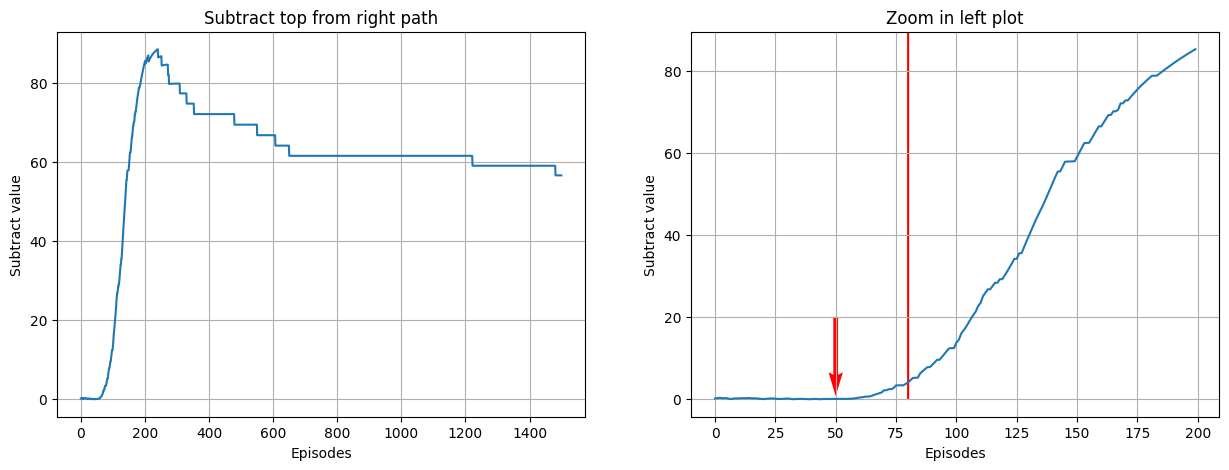

In [ ]:
subtractUpRight = listQStartUp - listQStartRight
routesValueSubtraction(50 , 20 , -0.15 , 80 )

In [ ]:
print('Average value after 1000 episodes: ' )

print('Q-Learning  : ' , np.mean(rewardsQl) )
print('Double DQN : ' , np.mean(rewardsDdqn) )

Average value after 1000 episodes: 
Q-Learning  :  14.928666666666667
Double DQN :  -209.902
